In [5]:
import sklearn
from sklearn import datasets  # Import datasets module
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn.linear_model import LinearRegression  # Import the LinearRegression class, for example
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# load excel sheet which starts with channel_XX ( dynamic channel number)
excel_file = pd.ExcelFile('dv_2022_10_28_10_Zyklen_0_3V_dann_0_15V_Channel_24.xlsx')

# Get the sheet names in the Excel file
sheet_names = excel_file.sheet_names
# Initialize an empty DataFrame to store the data
channel_data = pd.DataFrame()
# Iterate through the sheet names
for sheet_name in sheet_names:
    #Check if the sheet name starts with 'channel'
    if sheet_name.startswith('Channel'):
        # Load the sheet into a DataFrame
        channel_data = excel_file.parse(sheet_name)
#clean emty rows where all the values are NaN
channel_data.dropna(how='all', inplace=True)
channel_data.head()

# create new dataframe with only the relevant columns
data = pd.DataFrame()
data = channel_data[['Step_Time(s)', 'Voltage(V)', 'Current(A)','Cycle_Index']]
data.head()

# Filtering the data for the first charging cycle
def filter_cycle(cycle_number, charging = True):
    cycle_data = data[data['Cycle_Index'] == cycle_number]
    if charging:
        return cycle_data[cycle_data['Current(A)'] > 0]
    return cycle_data[cycle_data['Current(A)'] < 0]

In [12]:
from sklearn.cluster import DBSCAN


In [14]:
cluster = pd.DataFrame()
cluster = filter_cycle(1)
clustering = DBSCAN(eps=0.5, min_samples=5).fit(filter_cycle(1))
cluster['cluster'] = clustering.labels_
cluster

,Step_Time(s),Voltage(V),Current(A),Cycle_Index,cluster
362,1.0001,-0.075272,0.00498,1,-1
363,2.0002,-0.051050,0.00498,1,-1
364,3.0006,-0.043088,0.00498,1,-1
365,4.0010,-0.037670,0.00498,1,-1
366,5.0001,-0.033974,0.00498,1,-1
...,...,...,...,...,...
1354,993.0016,0.297650,0.00498,1,-1
1355,994.0015,0.298175,0.00498,1,-1
1356,995.0016,0.298729,0.00498,1,-1
1357,996.0015,0.299453,0.00498,1,-1


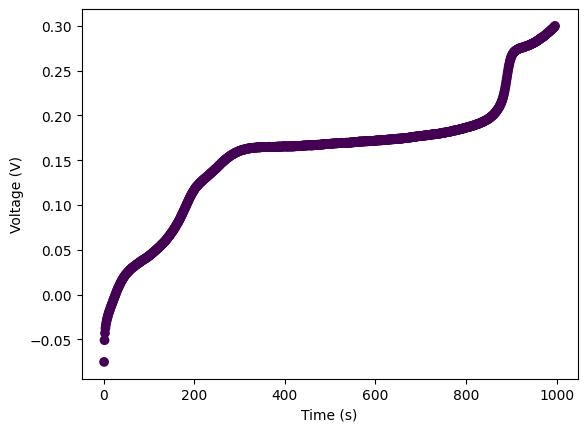

In [15]:
# plotting the clusters
plt.scatter(cluster['Step_Time(s)'], cluster['Voltage(V)'], c=cluster['cluster'])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()